In [1]:
# ! pip install seaborn
# ! pip install -U scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from IPython.display import display

# 1. Load the data in a data frame and print the first rows.

In [3]:
def load_dataset():
    return pd.read_csv('https://storage.googleapis.com/qwasar-public/track-ds/boston.csv')

In [4]:
boston_dataframe = load_dataset()
# boston_dataframe.head(10)

In [5]:
def print_summarize_dataset(dataset):
    print("Dataset dimension:")
    print(dataset.shape)
    
    print("\nFirst 10 rows of dataset:")
    display(dataset.head(10))
    
    print("\nStatistical summary:")
    display(dataset.describe())

In [6]:
print_summarize_dataset(boston_dataframe)

Dataset dimension:
(506, 14)

First 10 rows of dataset:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9



Statistical summary:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647422,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 2. Cleaning and Pre-processing

### Make a function that cleans the dataset from lines which any missing values.

In [18]:
def clean_dataset(boston_dataframe):
    boston_dataframe[boston_dataframe.notnull()]
    return boston_dataframe.dropna(axis = 0)

In [19]:
boston_dataframe = clean_dataset(boston_dataframe)

# 3.Data Analysis
### Plot each attribute in a histogram.

In [20]:
def print_histograms(boston_dataframe):
    params = {
           'CRIM'    : {'bins' : 100,'width' : 3   },
           'ZN'      : {'bins' : 40, 'width' : 4   },
           'INDUS'   : {'bins' : 40, 'width' : 1   },
           'CHAS'    : {'bins' : 20, 'width' : 0.05},
           'NOX'     : {'bins' : 50, 'width' : 0.01},
           'RM'      : {'bins' : 50, 'width' : 0.11},
           'AGE'     : {'bins' : 68, 'width' : 1.5 },
           'DIS'     : {'bins' : 50, 'width' : 0.25},
           'RAD'     : {'bins' : 22, 'width' : 0.8 },
           'TAX'     : {'bins' : 100, 'width' : 15 },
           'PTRATIO' : {'bins' : 40, 'width' : 0.3 },
           'B'       : {'bins' : 30, 'width' : 15  },
           'LSTAT'   : {'bins' : 74, 'width' : 0.7},
           'MDEV'    : {'bins' : 74, 'width' : 0.7}
        }
    for name in boston_dataframe.columns:
        plt.title(name)
        plt.hist(boston_dataframe[name], bins = params[name]['bins'], width = params[name]['width'])

        plt.grid()
        plt.show()

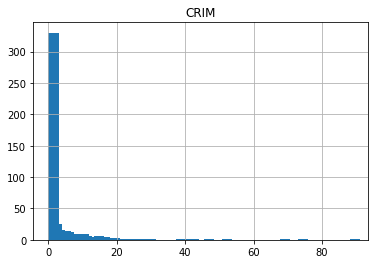

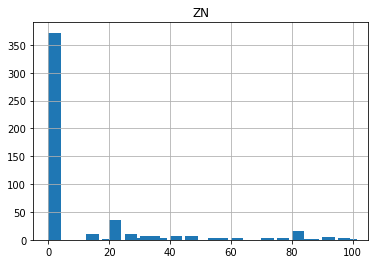

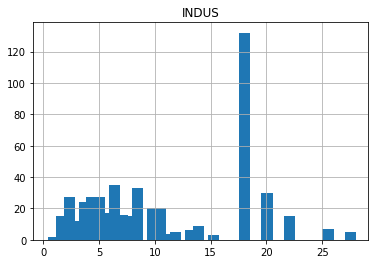

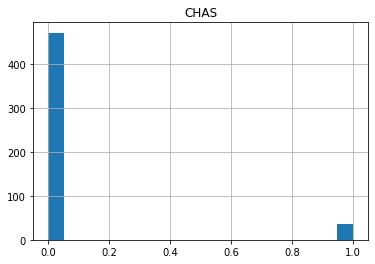

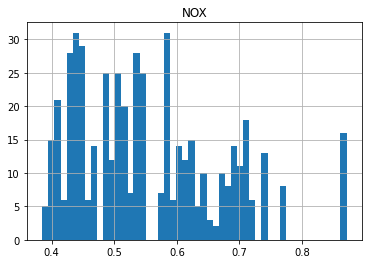

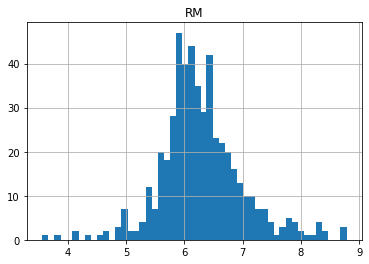

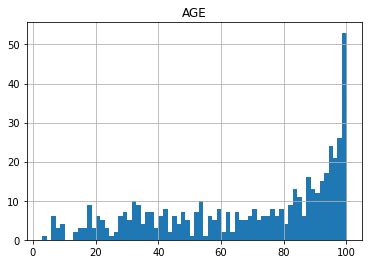

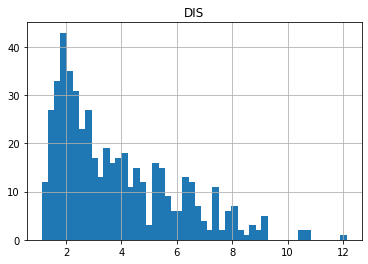

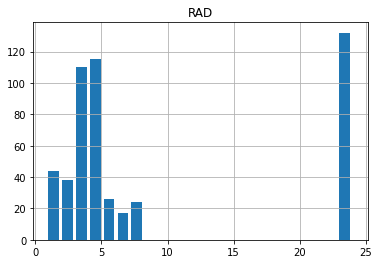

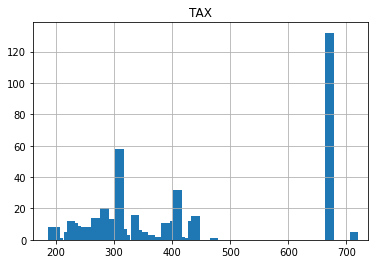

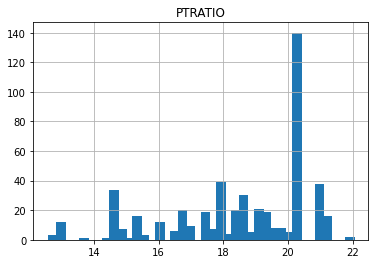

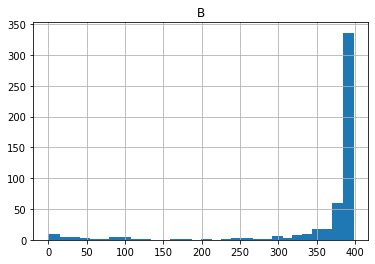

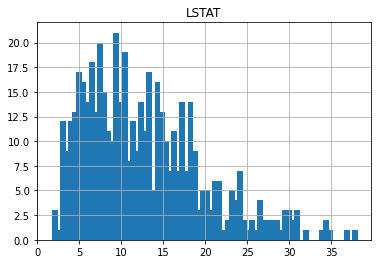

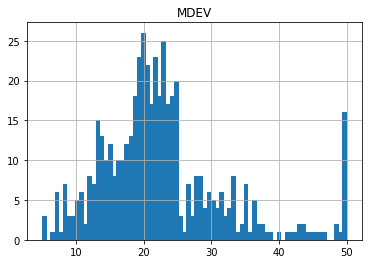

In [21]:
print_histograms(boston_dataframe)

### Looking for correlations

In [22]:
def compute_correlations_matrix(boston_dataframe):
    return boston_dataframe.corr(method = 'pearson')

In [24]:
correlations = compute_correlations_matrix(boston_dataframe)
print(correlations['MDEV'])

CRIM      -0.385832
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MDEV       1.000000
Name: MDEV, dtype: float64


# Plot every attribute against each other.


### It takes long time :)

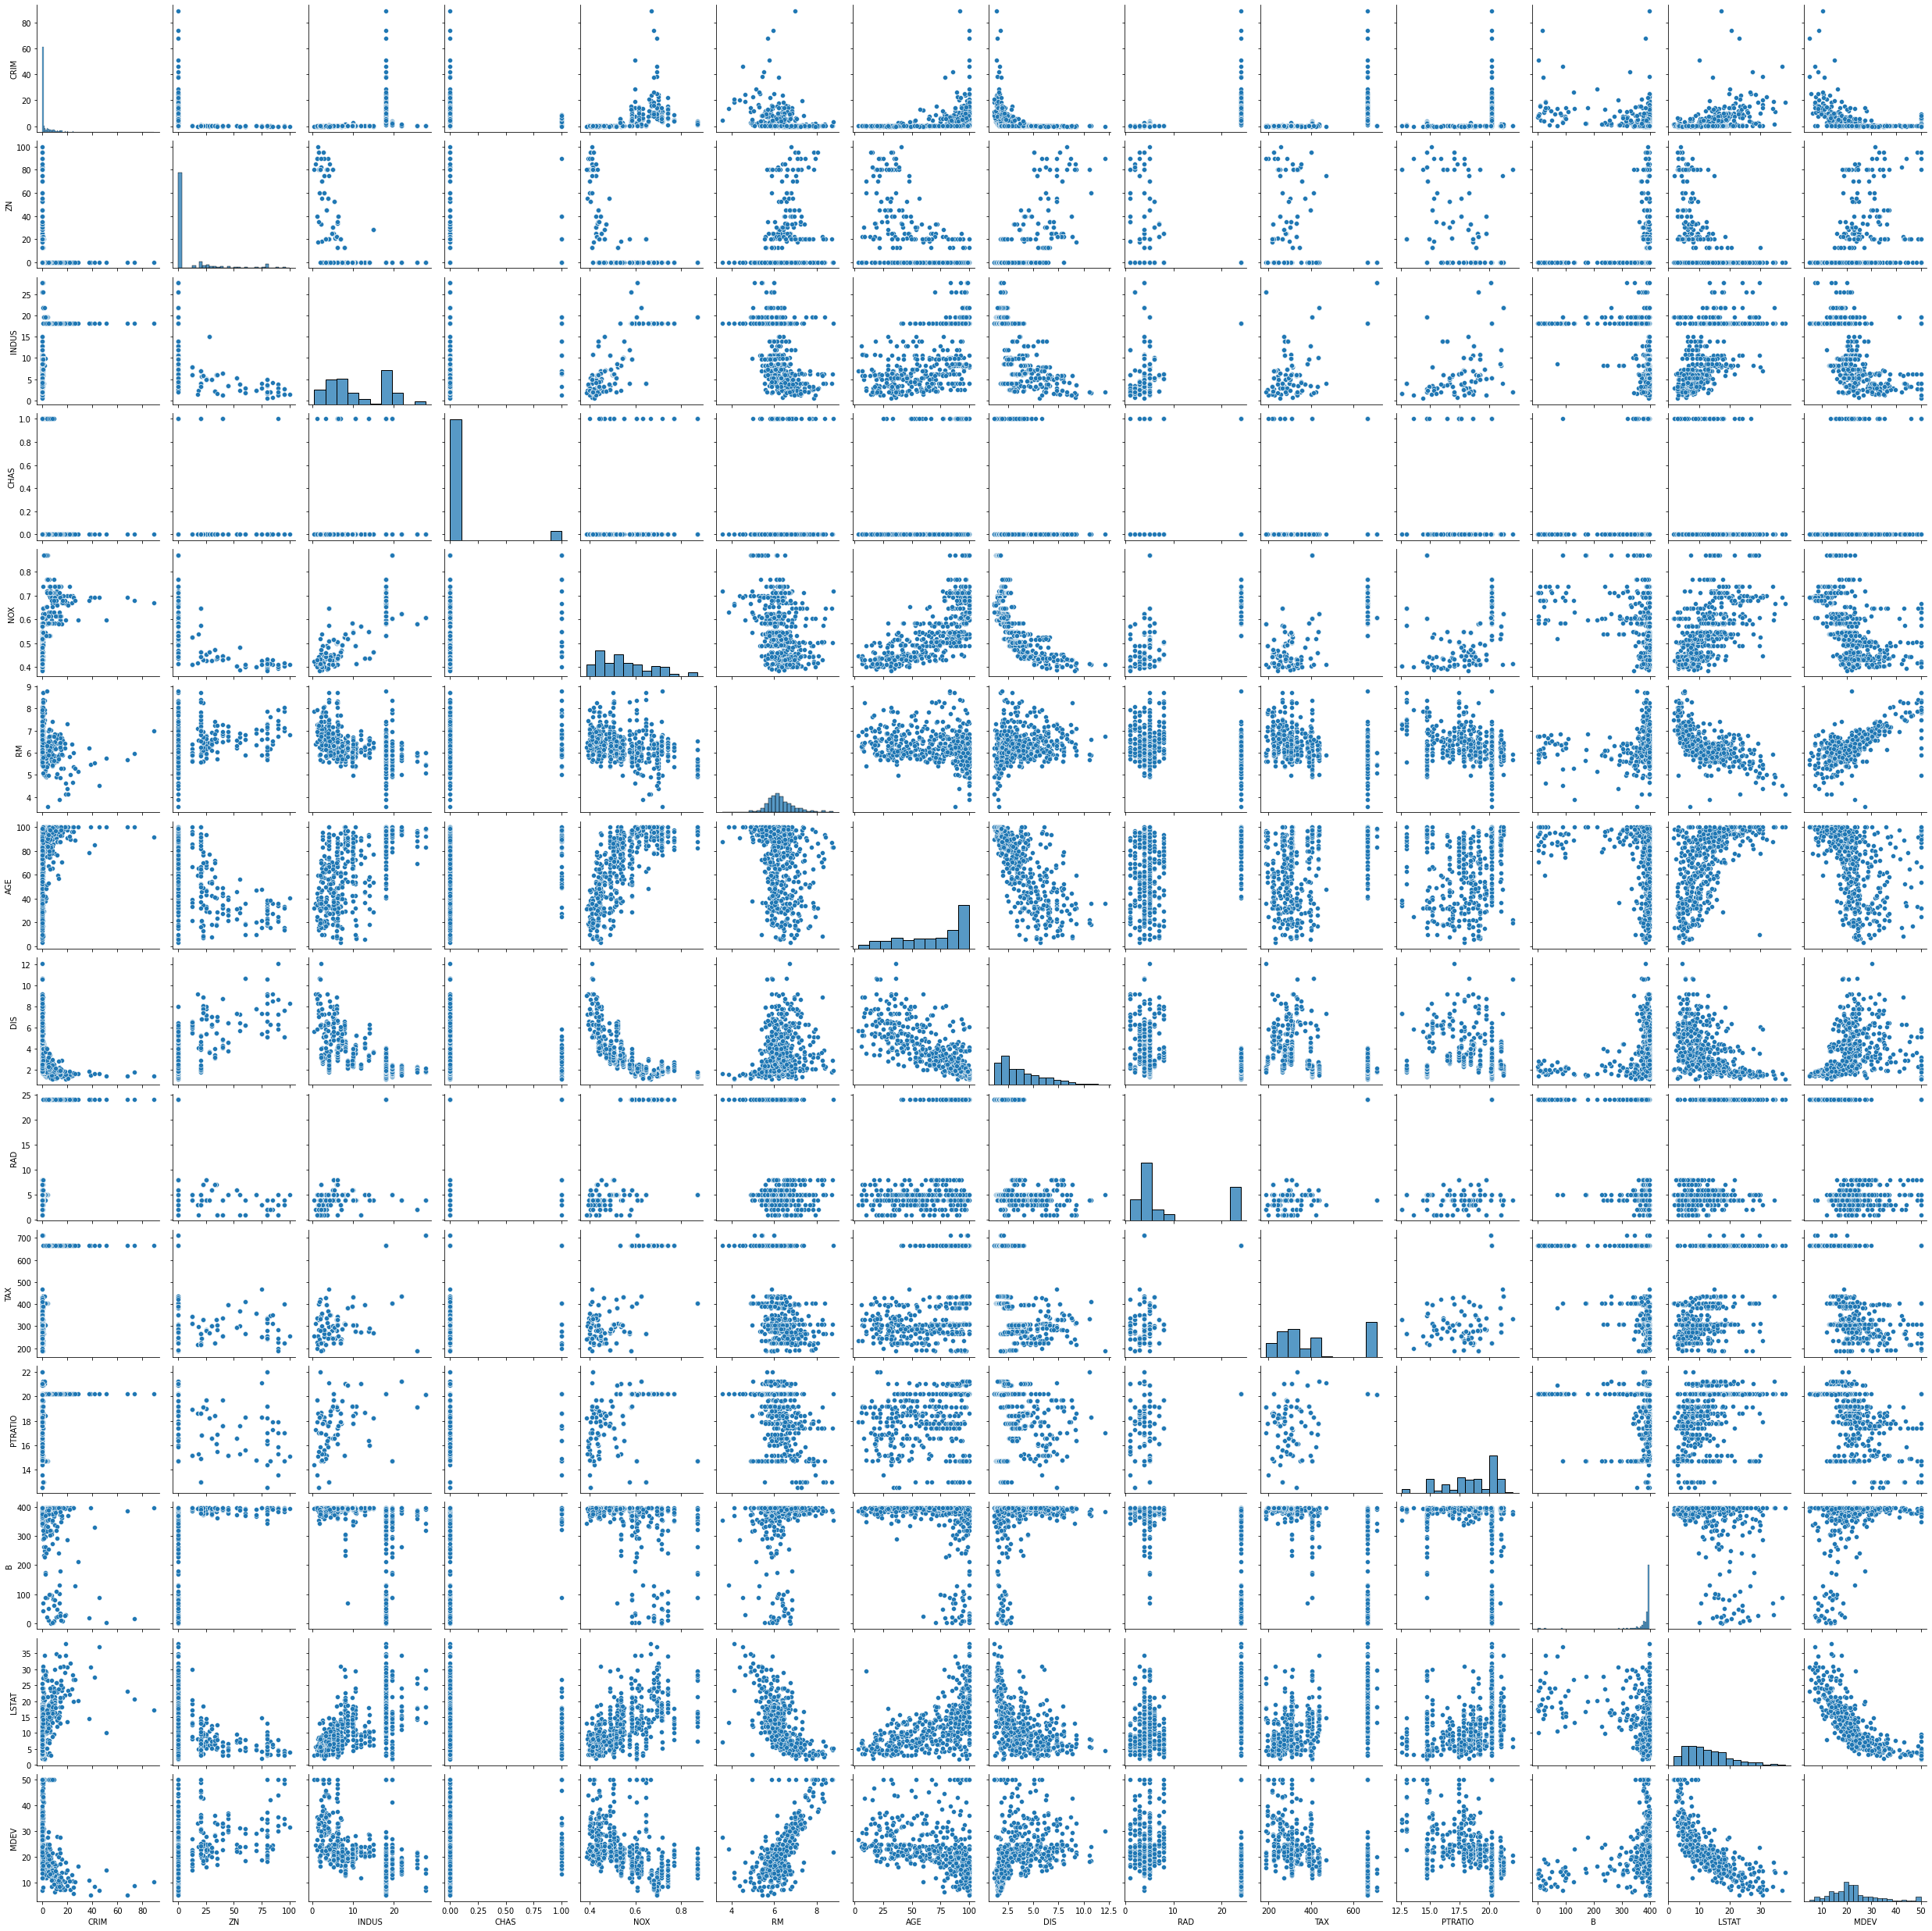

In [14]:
sns.pairplot(boston_dataframe)

### Make a function that prints the scatter matrix.

In [25]:
def print_scatter_matrix(boston_dataframe):
    # Plot the correlation scatter plot of the median value against LSTAT, AGE, and CRIME.
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,5)) 

    ax1.set_title('LSTAT')
    ax1.set_xlabel('LSTAT')
    ax1.set_ylabel('MDEV')
    ax1.scatter(x = boston_dataframe['LSTAT'], y = boston_dataframe['MDEV'])

    ax2.set_title('AGE')
    ax2.set_xlabel('AGE')
    ax2.set_ylabel('MDEV')
    ax2.scatter(x = boston_dataframe['AGE'], y = boston_dataframe['MDEV'])

    ax3.set_title('CRIM')
    ax3.set_xlabel('CRIM')
    ax3.set_ylabel('MDEV')
    ax3.scatter(x = boston_dataframe['CRIM'], y = boston_dataframe['MDEV'])

    plt.show()
    
    plt.figure(figsize=(15, 10))
    plt.title('LSTAT against AGE')
    plt.xlabel('AGE')
    plt.ylabel('LSTAT')

    plt.scatter(x = boston_dataframe['AGE'], y = boston_dataframe['LSTAT'])

    plt.show()

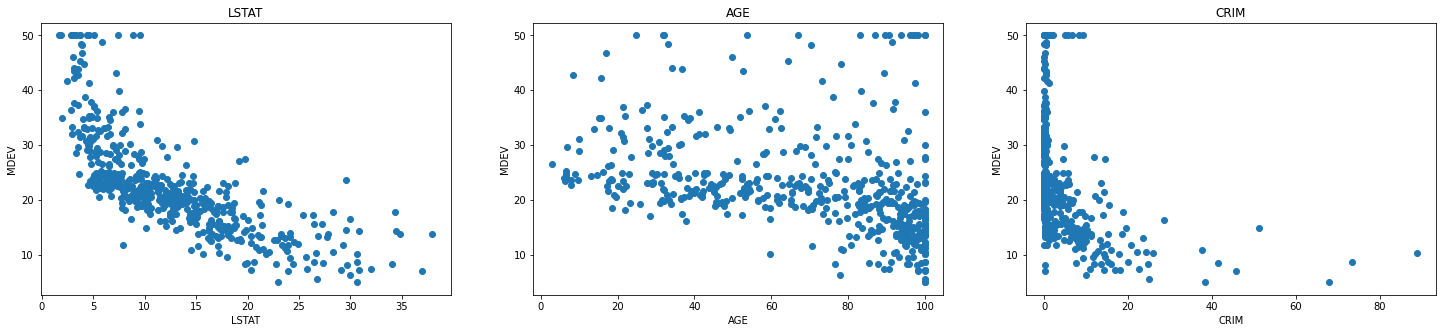

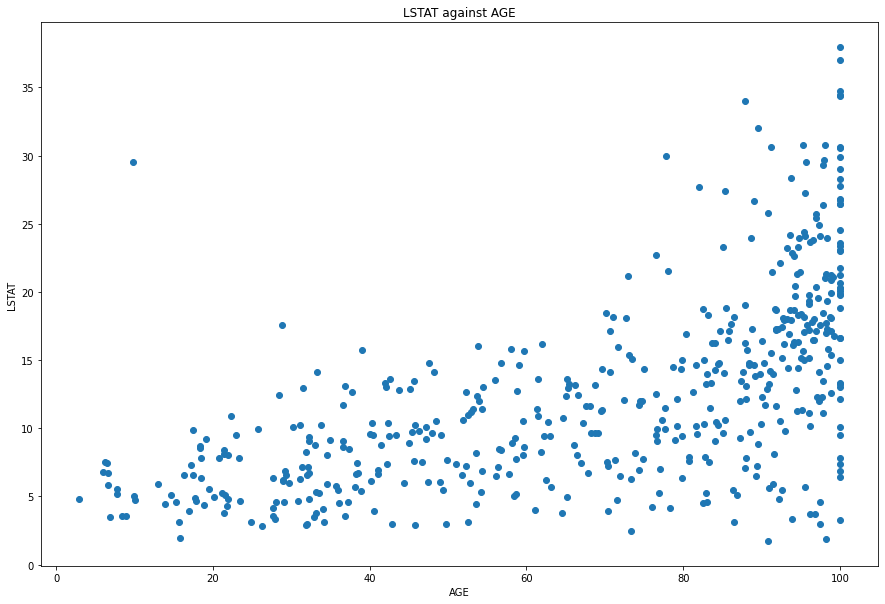

In [26]:
print_scatter_matrix(boston_dataframe)

# 4.Prediction

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [8]:
# boston_dataframe

In [16]:
def boston_fit_model(boston_dataframe):
    # SELECT two columns from our 
    model_dataset = boston_dataframe[["RM","MDEV"]]
    regressor = LinearRegression()
    # Extract column 1
    x = model_dataset.iloc[:, :-1].values
    # Extract column 2
    y = model_dataset.iloc[:, 1].values
    
    # Split the data int x and y test, predict 
    global X_test, Y_test
    X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2)
    
    X_train = np.array(X_train).reshape(-1, 1)
    Y_train = np.array(Y_train).reshape(-1, 1)
    
    # Train the model
    regressor.fit(X_train, Y_train)
    return regressor


In [17]:
def boston_predict(estimator, array_to_predict):
    array_to_predict = np.array(array_to_predict)
    return estimator.predict(array_to_predict.reshape(-1, 1))


In [18]:
data = [1, 2, 3]
estimator = boston_fit_model(boston_dataframe)
print(boston_predict(estimator, data))

[[-24.04946031]
 [-15.19551393]
 [ -6.34156755]]


In [26]:
def print_model_prediction_evaluator(base_test, prediction):
  print('Mean Absolute Error:', mean_absolute_error(base_test, prediction))
  print('Mean Squared Error:', mean_squared_error(base_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(mean_squared_error(base_test, prediction)))
  print(f"r2 score: {r2_score(Y_test, prediction)}")

In [27]:
Y_predict = estimator.predict(X_test)
print_model_prediction_evaluator(Y_test, Y_predict)

Mean Absolute Error: 3.853810459134195
Mean Squared Error: 28.75747092135788
Root Mean Squared Error: 5.362599269137857
r2 score: 0.600593304945657


In [3]:
!gandalf



 ██████╗ ██╗    ██╗ █████╗ ███████╗ █████╗ ██████╗    ██╗ ██████╗ 
██╔═══██╗██║    ██║██╔══██╗██╔════╝██╔══██╗██╔══██╗   ██║██╔═══██╗
██║   ██║██║ █╗ ██║███████║███████╗███████║██████╔╝   ██║██║   ██║
██║▄▄ ██║██║███╗██║██╔══██║╚════██║██╔══██║██╔══██╗   ██║██║   ██║
╚██████╔╝╚███╔███╔╝██║  ██║███████║██║  ██║██║  ██║██╗██║╚██████╔╝
 ╚══▀▀═╝  ╚══╝╚══╝ ╚═╝  ╚═╝╚══════╝╚═╝  ╚═╝╚═╝  ╚═╝╚═╝╚═╝ ╚═════╝ 
																																 
Booting Gandalf v4.1.12-deab022 (production)
Loading parameters:  OK
User temirov_s connection: OK


<MY_TU_VERRAS>
Directory . exists: OK
Pushing exercise: OK
Printing your report:

      REPORT         MY TU VERRAS  

 Status             SUCCESS        
 Execution Runtime  4.192268       
 Score              [=======-] 7/8 


Checks detail Report:

 TEST BOSTON FIT MODEL  SUCCESS 



 TEST BOSTON PREDICT  SUCCESS 



 TEST CLEAN DATASET  SUCCESS 



 TEST COMPUTE CORRELATIONS MATRIX  SUCCESS 



 TEST LOAD DATASET  SUCCESS 



 TEST PRINT HISTOGRAMS  SUC